# Challenge 1: Binary Detection 1

The first step is to import relevant libraries.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The second step is to import data from the given file.

In [11]:
df = pd.DataFrame.from_csv("1challenge.csv")
df0 = df.loc[df['label'] == 1.0]
df1 = df.loc[df['label'] == 0.0]
dftest = df.loc[~((df['label'] == 0.0) | (df['label'] == 1.0))]
print(df0.shape)
print(df1.shape)
print(dftest.shape)

(4000, 3)
(6000, 3)
(5000, 3)


One can use the data in their original Pandas DataFrame format, or one can transform these objects into Numpy-arrays.

In [12]:
TrainingData0 = df0.as_matrix(columns=None)
TrainingData1 = df1.as_matrix(columns=None)
TestData = dftest.as_matrix(columns=['Y0', 'Y1'])

It may be helpful to visualize the data.

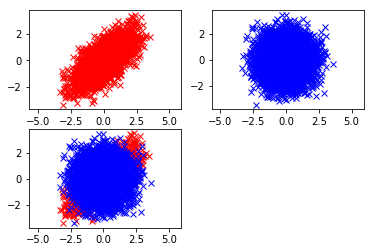

In [13]:
plt.figure(1)

plt.subplot(221) 
plt.plot(TrainingData0[:,0], TrainingData0[:,1], 'x', color='r')
plt.axis('equal')

plt.subplot(222) 
plt.plot(TrainingData1[:,0], TrainingData1[:,1], 'x', color='b')
plt.axis('equal')

plt.subplot(223) 
plt.plot(TrainingData0[:,0], TrainingData0[:,1], 'x', color='r')
plt.plot(TrainingData1[:,0], TrainingData1[:,1], 'x', color='b')
plt.axis('equal')

plt.show()

Classification Algorithm
#Assume that class 0&1 follow 2-D Gaussian distribution

In [14]:
#classification algorithm
def Classification(trainset0,trainset1,testset):
    num=np.array(testset.shape)[0]
    predicted=np.zeros((num,1))
    ratio=np.array(trainset1.shape)[0]/np.array(trainset0.shape)[0]
    #estimate mean and covariance matrix of class 0&1
    var0=np.cov(trainset0,rowvar=0)
    var1=np.cov(trainset1,rowvar=0)
    mean0=np.mean(trainset0,axis=0)
    mean1=np.mean(trainset1,axis=0)
    
    for i in range (0,num):
        pdf0=np.exp(-1/2*np.dot(np.dot((testset[i,:]-mean0), np.linalg.inv(var0)),(testset[i,:]-mean0))) \
            /(2*np.pi*np.sqrt(np.linalg.det(var0)))
            
        pdf1=np.exp(-1/2*np.dot(np.dot((testset[i,:]-mean1), np.linalg.inv(var1)),(testset[i,:]-mean1))) \
            /(2*np.pi*np.sqrt(np.linalg.det(var1)))
    
        if(pdf1*ratio>pdf0):
            predicted[i,0]=1
        else:
            predicted[i,0]=0
            
    return predicted

In [15]:
predicted=Classification(TrainingData1[:,0:2],TrainingData0[:,0:2],TestData)
Array_train=np.append(TrainingData0,TrainingData1,axis=0)
Array_test=np.append(TestData,predicted,axis=1)
Array=np.append(Array_train,Array_test,axis=0)

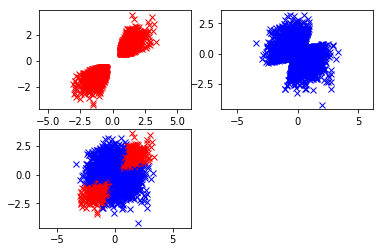

In [16]:
plt.figure(2)

plt.subplot(221) 
for i in range (0,5000):
    if (Array_test[i,2]==1):
        plt.plot(Array_test[i,0],Array_test[i,1],'x',color='r')
plt.axis('equal')

plt.subplot(222) 
for i in range (0,5000):
    if (Array_test[i,2]==0):
        plt.plot(Array_test[i,0],Array_test[i,1],'x',color='b') 
plt.axis('equal')

plt.subplot(223) 
for i in range (0,5000):
    if (Array_test[i,2]==0):
        plt.plot(Array_test[i,0],Array_test[i,1],'x',color='b') 
    else:
        plt.plot(Array_test[i,0],Array_test[i,1],'x',color='r') 
plt.axis('equal')

plt.show()

In [18]:
#Using training set to calculate the accuracy of classification

predicted_train=Classification(TrainingData1[:,0:2],TrainingData0[:,0:2],Array_train[:,0:2])
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1]==predictions[x]:
            correct += 1
    return (correct/float(len(testSet)))

accuracy = getAccuracy(Array_train, predicted_train)
print(accuracy)

0.6506


In [17]:
dfnew=pd.DataFrame({'Y0':Array[:,0],'Y1':Array[:,1],'label':Array[:,2]})
dfnew.to_csv("1challenge.csv")